In [363]:
import numpy as np
import pandas as pd
from math import sqrt
from scipy import optimize as op
from matplotlib import pyplot as plt

# Data Preprocessing

In [470]:
main_data = pd.read_csv('04_cricket_1999to2011.csv',sep=',')

data = main_data
data = data[['Match','Over','Runs','Total.Out']]
data = np.array(data)
print(data.shape)
# Nx100 Matrix holding history data 
Innings1 = list()

inning = np.zeros(100)
i=0
for d in data[:]:
    if d[0]==1 or i==50:
        while i!=50:
            inning[i],inning[i+50] = inning[i-1],inning[50+i-1]
            i+=1
        Innings1.append(inning)
        inning = np.zeros(100)
        i=0
    inning[i],inning[i+50] = inning[i-1]+d[2],d[3]
    i+=1

Innings1 = np.array(Innings1)     

#The over at which 10 wickets fall in innings 1
Innings1_allOut = np.zeros(Innings1.shape[0])
i=0
test = 1
for inning in Innings1:
    Innings1_allOut[i] = np.searchsorted(inning[50:],10)
    if Innings1_allOut[i]<50 and test <= 0:
        print(inning)
        print(Innings1_allOut[i])
        test += 1
    i+=1

(126768, 4)


In [471]:
Innings1.shape

(2535, 100)

In [476]:
_,S,_ = np.linalg.svd(Innings1[:50])
print(S)
S = np.int16(np.ceil(S))
print(S)

centers = np.unique(S)
print(centers)
freq = np.bincount(S)
hist = np.zeros(centers.shape[0])
i=0
for c in centers:
    hist[i] = freq[c]
    i+=1
print(hist)

plt.clf()
plt.subplot(311)
plt.title('Singular Value Spectrum')
plt.plot(hist,centers,c='b',label="Runs")

_,S,_ = np.linalg.svd(Innings1[50:])
S = np.abs(np.int16(np.ceil(S)))
centers = np.unique(S)
freq = np.bincount(S)
hist = np.zeros(centers.shape[0])
i=0
for c in centers:
    hist[i] = freq[c]
    i+=1
plt.subplot(312)
plt.plot(hist,centers,label='Wickets',c='r')

_,S,_ = np.linalg.svd(Innings1)
S = np.abs(np.int16(np.ceil(S)))
centers = np.unique(S)
freq = np.bincount(S)
hist = np.zeros(centers.shape[0])
i=0
for c in centers:
    hist[i] = freq[c]
    i+=1
plt.subplot(313)
plt.plot(hist,centers,label='Combined',c='g')
plt.savefig('spectrum.pdf',dpi=200)
plt.clf()



[6.53303788e+03 3.92736080e+02 2.71132322e+02 1.53706824e+02
 9.52431314e+01 8.94449764e+01 7.31973594e+01 6.08393900e+01
 5.22612287e+01 5.00327376e+01 4.71507876e+01 4.17568054e+01
 3.69960838e+01 3.50740920e+01 3.29493439e+01 3.25154581e+01
 3.10754136e+01 2.88559000e+01 2.65241202e+01 2.47814455e+01
 2.31082742e+01 2.26300877e+01 2.12799420e+01 1.92057012e+01
 1.87917341e+01 1.86015337e+01 1.73137083e+01 1.61391240e+01
 1.58810736e+01 1.54891727e+01 1.42510591e+01 1.39522959e+01
 1.37516489e+01 1.34453453e+01 1.26184522e+01 1.15362528e+01
 9.92958797e+00 9.64495548e+00 9.28293702e+00 9.20932005e+00
 8.84157323e+00 8.39550841e+00 7.39770130e+00 7.03124221e+00
 6.36510122e+00 6.07220553e+00 5.84976001e+00 5.33580960e+00
 4.70190675e+00 4.23899927e+00]
[6534  393  272  154   96   90   74   61   53   51   48   42   37   36
   33   33   32   29   27   25   24   23   22   20   19   19   18   17
   16   16   15   14   14   14   13   12   10   10   10   10    9    9
    8    8    7    7   

<Figure size 432x288 with 0 Axes>

In [235]:
Innings1_allOut[0]

44.0

In [236]:
Innings1[0]

array([  4.,   6.,   9.,  11.,  17.,  20.,  22.,  23.,  30.,  30.,  34.,
        36.,  43.,  44.,  45.,  49.,  56.,  65.,  72.,  80.,  87.,  91.,
       100., 102., 105., 108., 108., 110., 124., 127., 130., 133., 133.,
       135., 138., 147., 161., 162., 162., 167., 169., 176., 182., 185.,
       196., 196., 196., 196., 196., 196.,   0.,   0.,   0.,   0.,   0.,
         0.,   1.,   1.,   1.,   2.,   2.,   2.,   3.,   4.,   5.,   5.,
         5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,   5.,
         5.,   5.,   6.,   6.,   6.,   7.,   7.,   7.,   7.,   7.,   7.,
         7.,   8.,   8.,   8.,   8.,   9.,  10.,  10.,  10.,  10.,  10.,
        10.])

In [339]:
data = main_data[main_data['Innings']==2]
data = data[['Over','Runs','Total.Out','Target.Score']]
data = np.array(data)
# Nx101 Matrix with Target in last column
Innings2 = list()

inning = np.zeros(101)
i=0
target=0
for d in data[:]:
    if d[0]==1 or i==50:
        while i!=50:
            inning[i],inning[i+50] = inning[i-1],inning[50+i-1]
            i+=1
        if inning[49]<400 and inning[49]>150 and inning[50]>=0  and inning[-2]<=10 and np.all(np.diff(inning[:50])>=0) and np.all(np.diff(inning[50:100])>=0):
            inning[-1] = target
            Innings2.append(inning)
        inning = np.zeros(101)
        i=0
        target = d[3]
    inning[i],inning[i+50] = inning[i-1]+d[1],d[2]
    i+=1

Innings2 = np.array(Innings2)     
Innings2 = Innings2

print(Innings2.shape)

#The over at which 10 wickets fall in innings 2
Innings2_allOut = np.zeros(Innings2.shape[0])
i=0
for inning in Innings2:
    Innings2_allOut[i] = np.searchsorted(inning[50:100],10)
    i+=1

(1134, 101)


## mRSC Algorithm

In [465]:
def mRSC(X,data,intervention_point,k,W):
    U,S,V = np.linalg.svd(data)
    S_ = np.diag(S[:k])
    M = U[:,:k]@S_@V[:k,:]    

    M_k = np.zeros(shape=(M.shape[0],2*intervention_point))
    M_k[:,:intervention_point],M_k[:,intervention_point:] = M[:,:intervention_point],W*M[:,50:50+intervention_point]
    X[intervention_point:] = W*X[intervention_point:] 

    xopt,rnorm = op.nnls(A=M_k.transpose(),b=X)
    #res = op.lsq_linear(M_k.transpose(),X)
    #xopt = res.x
    result = np.int16(np.round(xopt@M))
    
    finish = np.searchsorted(result[50:],10,side='left')
    
    return result,finish

## Task 1 : Estimate Deviations in Predictions of 1st Innings

In [433]:
np.random.shuffle(Innings1)
P = int(Innings1.shape[0]*0.8)
train,test = Innings1[:P,:],Innings1[P:,:]
print(train.shape)
print(test.shape)

(1084, 100)
(271, 100)


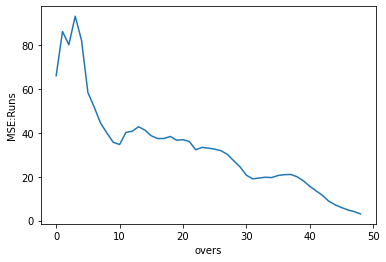

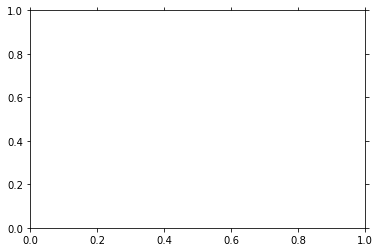

In [227]:
error = np.zeros(50)
for inning in test[:30]:
    for intervention_point in range(1,50):
        Z = np.zeros(2*intervention_point)
        Z[:intervention_point],Z[intervention_point:] = inning[:intervention_point],inning[50:50+intervention_point]
        prediction,finish = mRSC(Z,train,intervention_point,4,1)
        error[intervention_point] += (inning[finish-1]-prediction[finish-1])**2
error /= test.shape[0]
error = np.sqrt(error)
plt.plot(error[1:])
plt.xlabel('overs')
plt.ylabel('MSE:Runs')
plt.show()
plt.cla()

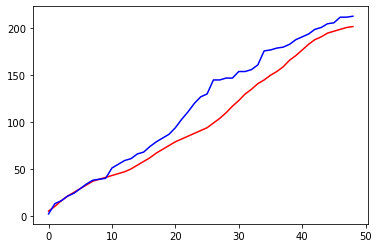

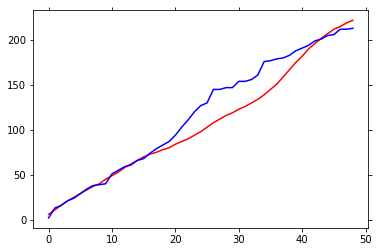

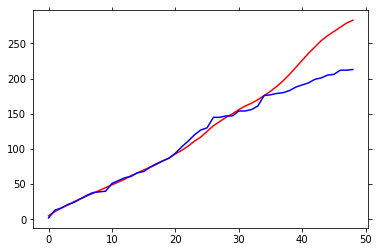

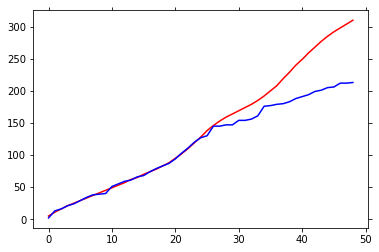

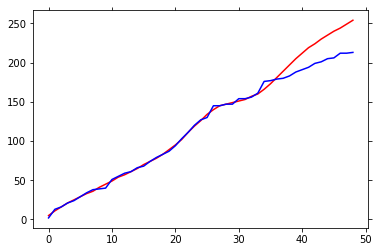

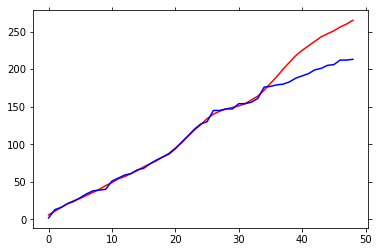

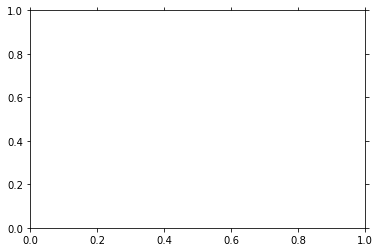

In [434]:
error = np.zeros(50)
inning = test[np.random.randint(test.shape[0])]
for intervention_point in [10,15,20,25,30,35]:
    i=0
    Z = np.zeros(2*intervention_point)
    Z[:intervention_point],Z[intervention_point:] = inning[:intervention_point],inning[50:50+intervention_point]
    Wopt = 1
    loss = np.inf
    match = np.zeros(100)
    final_finish=0
    for W in np.linspace(0.5,4,30):
        prediction,finish = mRSC(Z,train,intervention_point,10,W)
        A = np.zeros(2*intervention_point)
        A[:intervention_point],A[intervention_point:] = prediction[:intervention_point],prediction[50:50+intervention_point]
        diff1 = sqrt(np.mean(np.square(A[:intervention_point]-Z[:intervention_point])))
        diff2 = sqrt(np.mean(np.square(A[intervention_point:]-Z[intervention_point:])))
        if diff1+W*diff2 <= loss:
            Wopt = W
            loss = diff1+W*diff2
            match = prediction
            final_finish = finish
    error[i] = (match[final_finish-1]-inning[final_finish-1])
    i+=1
    plt.plot(match[:final_finish-1],c='r')
    plt.plot(inning[:final_finish-1],c='b')
    plt.show()
    plt.cla()

# Task 2 : Prediction

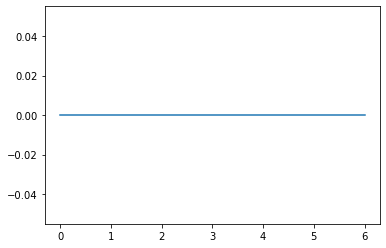

In [223]:
def is_valid(inning):
    if inning[49]<450 and inning[49]>150 and inning[-1]<=10 and inning[50] >=0 and np.all(np.diff(inning[:50])>=0) and np.all(np.diff(inning[50:])>=0):
        return True 
    else:
        return False

tt = 1
error = np.zeros(8)
matches = test[np.random.randint(0,test.shape[0],20),:]
for intervention_point in [30,35,40,45]:
    i=0
    for inning in matches:
        Z = np.zeros(2*intervention_point)
        Z[:intervention_point],Z[intervention_point:] = inning[:intervention_point],inning[50:50+intervention_point]
        Wopt = 1
        loss = np.inf
        match = np.zeros(100)
        final_finish=np.searchsorted(inning[:50],10)
        for W in np.linspace(0.5,4,20):
            prediction,finish = mRSC(Z,train,intervention_point,10,W)
            A = np.zeros(2*intervention_point)
            A[:intervention_point],A[intervention_point:] = prediction[:intervention_point],prediction[50:50+intervention_point]
            diff1 = sqrt(np.mean(np.square(A[:intervention_point]-Z[:intervention_point])))
            diff2 = sqrt(np.mean(np.square(A[intervention_point:]-Z[intervention_point:])))
            if diff1+W*diff2 <= loss:
                Wopt = W
                loss = diff1+W*diff2
                match = prediction
        error[i] += (match[final_finish-1]-inning[final_finish-1])**2

        if tt<=0 and intervention_point :
            print(inning)
            print(match)
            tt+=1
    i+=1
error /= matches.shape[0]
error = np.sqrt(error)
plt.plot(error[1:])
plt.show()

# Task 1 : Vary k

In [381]:
#Task 1

# k = [1,2,3,4,5,10,25], inter = [10,15,20,25,30,35,40,45] , matches = {200} and save csv

errors = pd.read_csv('Error_matrix.csv')
errors = np.array(errors)

err = np.zeros((10,8))
K = [1,2,3,4,5,10,15,20,25,30]

for k in range(1,11):
    j=0
    for intervention_point in [10,15,20,25,30,35,40,45]:
        intervention_point-=1
        err[k-1,j] = errors[intervention_point,k]
        j+=1

i=0
for er in err[:]:
    plt.clf()
    plt.xlabel('Overs')
    plt.ylabel('RMSE:Runs')
    plt.title(f'k={K[i]}')
    plt.plot([10,15,20,25,30,35,40,45],er)
    plt.savefig(f'./T1/T1_{K[i]}.pdf',dpi=200)

    i+=1
    plt.clf()
        
        



<Figure size 432x288 with 0 Axes>

In [384]:
errors = pd.read_csv('Error_matrix.csv')
errors = np.array(errors)

err = np.zeros((10,8))
K = [1,2,3,4,5,10,15,20,25,30]

for intervention_point in [10,15,20,25,30,35,40,45]:
    intervention_point-=1
    Y = errors[intervention_point,1:]
    plt.clf()
    plt.xlabel('k')
    plt.ylabel('RMSE:Runs')
    plt.title(f'Intervention Point : {intervention_point+1}')
    plt.plot(K,Y)
    plt.savefig(f'./T3/T3_{intervention_point+1}.pdf',dpi=200)
    plt.clf()


<Figure size 432x288 with 0 Axes>

In [469]:
# Plot trajectories for 10 matches and save csv
matches = test[np.random.randint(0,test.shape[0],10),:]

def is_valid(inning):
    if inning[49]<450 and inning[49]>150 and inning[-1]<=10 and inning[50] >=0 and np.all(np.diff(inning[:50])>=0) and np.all(np.diff(inning[50:])>=0):
        return True 
    else:
        return False

i=1
intervention_point=30
k=10
for inning in test:
    finish = np.searchsorted(inning[50:],10)-1
    if finish<45:
        continue

    Z = np.zeros(2*intervention_point)
    Z[:intervention_point],Z[intervention_point:] = inning[:intervention_point],inning[50:50+intervention_point]
    
    prediction1,_ = mRSC(Z,train,intervention_point,k,1)

    loss = np.inf
    match = np.zeros(100)
    for W in np.linspace(0,1,40):
        prediction,_ = mRSC(Z,train,intervention_point,k,W)
        A = np.zeros(2*intervention_point)
        A[:intervention_point],A[intervention_point:] = prediction[:intervention_point],prediction[50:50+intervention_point]
        diff1 = sqrt(np.mean(np.square(A-Z)))
        diff2 = 0
        if diff1+W*diff2 <= loss:
            Wopt = W
            loss = diff1+W*diff2
            match = prediction
    
    if np.abs(match[finish]-inning[finish])>5:
        continue
    plt.clf()
    plt.xlabel('Overs')
    plt.ylabel('Runs')
    plt.title(f'Sample : {i}')
    plt.plot(prediction1[:finish],c='g',label='W=1')
    plt.plot(inning[:finish],c='r',label='inning')
    plt.plot(match[:finish],c='b',label=f'W={Wopt:.2}')

    plt.legend()
    plt.savefig(f'./T2/{i}.pdf',dpi=200)
    i+=1
    if i==10:
        break

plt.clf()


<Figure size 432x288 with 0 Axes>

In [ ]:
#Task 2 
# Report errors, prediction, sample-errors csv



In [272]:
matches = test[np.random.randint(0,test.shape[0],200),:]
error = np.zeros((6,50))
i=0
for k in [1,2,5,10,20,30]:
    for inning in matches:
        for intervention_point in range(1,50):
            Z = np.zeros(2*intervention_point)
            Z[:intervention_point],Z[intervention_point:] = inning[:intervention_point],inning[50:50+intervention_point]
            Wopt = 1
            loss = np.inf
            match = np.zeros(100)
            final_finish=np.searchsorted(inning[:50],10)-1
            for W in [1,2,3,4,5]:
                prediction,finish = mRSC(Z,train,intervention_point,10,W)
                A = np.zeros(2*intervention_point)
                A[:intervention_point],A[intervention_point:] = prediction[:intervention_point],prediction[50:50+intervention_point]
                diff1 = sqrt(np.mean(np.square(A[:intervention_point]-Z[:intervention_point])))
                diff2 = sqrt(np.mean(np.square(A[intervention_point:]-Z[intervention_point:])))
                if diff1+W*diff2 <= loss:
                    Wopt = W
                    loss = diff1+W*diff2
                    match = prediction
            error[i,intervention_point-1] += (match[final_finish]-inning[final_finish])**2
    i+=1
error /= 10
error = np.sqrt(error)
i=0
for k in [1,2,5,10,20,30]:
    plt.plot(error[i,:])
    plt.xlabel('Overs Used')
    plt.ylabel('MSE:Runs')
    plt.title(f'Error plot for k={k}')
    plt.savefig(f'./Task2/T2_k={k}.pdf',dpi=200)
    plt.clf()
    i+=1



<Figure size 432x288 with 0 Axes>

In [480]:
def mRSC2(X,data,intervention_point,k):
    U,S,V = np.linalg.svd(data)
    S_ = np.diag(S[:k])
    M = U[:,:k]@S_@V[:k,:]    

    M_k = np.zeros(shape=(M.shape[0],2*intervention_point+1))
    M_k[:,:intervention_point],M_k[:,intervention_point:2*intervention_point] = M[:,:intervention_point],M[:,50:50+intervention_point]
    M_k[:,-1] = data[:,100]
    X[intervention_point:] = X[intervention_point:] 

    xopt,rnorm = op.nnls(A=M_k.transpose(),b=X)
    result = np.int16(np.round(xopt@M))
    
    finish = np.searchsorted(result[50:],10,side='left')
    
    return result,finish

np.random.shuffle(Innings2)
cv_test,test,train = Innings2[:200],Innings2[200:400],Innings2[400:]

print(cv_test.shape)


(200, 101)


In [484]:
sample_error = np.zeros((51,200))
i=-1
for inning in cv_test:
    i+=1
    finish = np.searchsorted(inning[50:],10)-1
    sample_error[-1,i] = finish
    for intervention_point in range(1,50):
        Z = np.zeros(2*intervention_point+1)
        Z[:intervention_point],Z[intervention_point:2*intervention_point] = inning[:intervention_point],inning[50:50+intervention_point]    
        Z[-1] = inning[-1]
        prediction,_ = mRSC2(Z,train,intervention_point,3)
        sample_error[intervention_point-1,i] = prediction[finish]-inning[finish]

sample_error = pd.DataFrame(data=sample_error, columns=range(200))
sample_error.to_csv('sample_error.csv')

In [416]:
prediction_score = np.zeros((50,200))
target = np.zeros((200,3))
i=-1
for inning in test:
    i+=1
    finish = np.searchsorted(inning[50:100],10)-1
    for intervention_point in range(1,50):
        Z = np.zeros(2*intervention_point+1)
        Z[:intervention_point],Z[intervention_point:2*intervention_point] = inning[:intervention_point],inning[50:50+intervention_point]    
        Z[-1] = inning[-1]
        prediction,_ = mRSC2(Z,train,intervention_point,3)
        prediction_score[intervention_point-1,i] = prediction[finish-1]
    target[i,0] = inning[-1]
    target[i,1] = inning[49]
    target[i,2] = finish

prediction_score = pd.DataFrame(data=prediction_score,columns=range(200))
target = pd.DataFrame(data=target, columns=['Target','Actual-Score','End-Over'])
prediction_score.to_csv('predict_score.csv')
target.to_csv('target.csv')
 

In [348]:
sample_error.to_csv("sample_error.csv")

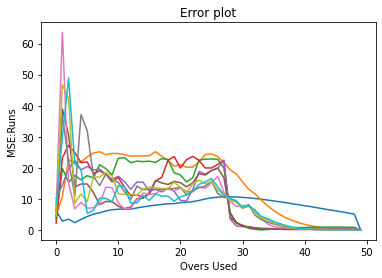

<Figure size 432x288 with 0 Axes>

In [265]:
i=0
for k in [1,2,3,4,5,10,15,20,25,30]:
    plt.plot(error[i,:],label=f'{k}')
    plt.xlabel('Overs Used')
    plt.ylabel('MSE:Runs')
    plt.title(f'Error plot')
    i+=1

plt.show()
plt.clf()

In [259]:
error = np.round(error,3)
error_matrix = pd.DataFrame(data=error.transpose(),columns=[1,2,3,4,5,10,15,20,25,30])
error_matrix.to_csv('Error_matrix.csv')